In [1]:
#!pip install ipywidgets
#!pip install torchview
import torch
import graphviz
from torchview import draw_graph
from net_visualize import VizNet
graphviz.set_jupyter_format('png')
torch.cuda.is_available()

True

In [6]:
pth_path = "dle_net_nobnlr.pth"
channels = 3
model = Net(input_nc=channels, output_nc=channels).cuda()
check_point = torch.load(pth_path)

In [7]:
from collections import OrderedDict
new_state_dict = OrderedDict()
mod_dict = {}
mod_keys = []
mod_cnt = 0
for k, v in check_point.items():
    name = k[7:] # remove 'module.' of dataparallel
    new_state_dict[name]=v
    mod_name = k.split(".")[1]
    if mod_name in mod_keys:
        continue
    else:
        mod_keys.append(mod_name)
        mod_cnt += 1
        mod_dict[mod_cnt] = mod_name
model.load_state_dict(new_state_dict, strict=False)

<All keys matched successfully>

In [8]:
mod_dict

{1: 'conv1_1_lr_bn',
 2: 'conv1_2_lr_bn',
 3: 'conv2_1_lr_bn',
 4: 'conv2_2_lr_bn',
 5: 'conv3_1_lr_bn',
 6: 'conv3_2_lr_bn',
 7: 'conv4_1_lr_bn',
 8: 'conv4_2_lr_bn',
 9: 'conv5_1_lr_bn',
 10: 'conv5_2_lr_bn',
 11: 'deconv5',
 12: 'conv6_1_lr_bn',
 13: 'conv6_2_lr_bn',
 14: 'deconv6',
 15: 'conv7_1_lr_bn',
 16: 'conv7_2_lr_bn',
 17: 'deconv7',
 18: 'conv8_1_lr_bn',
 19: 'conv8_2',
 20: 'deconv8',
 21: 'conv9_1_lr_bn',
 22: 'conv9_2_lr',
 23: 'conv10'}

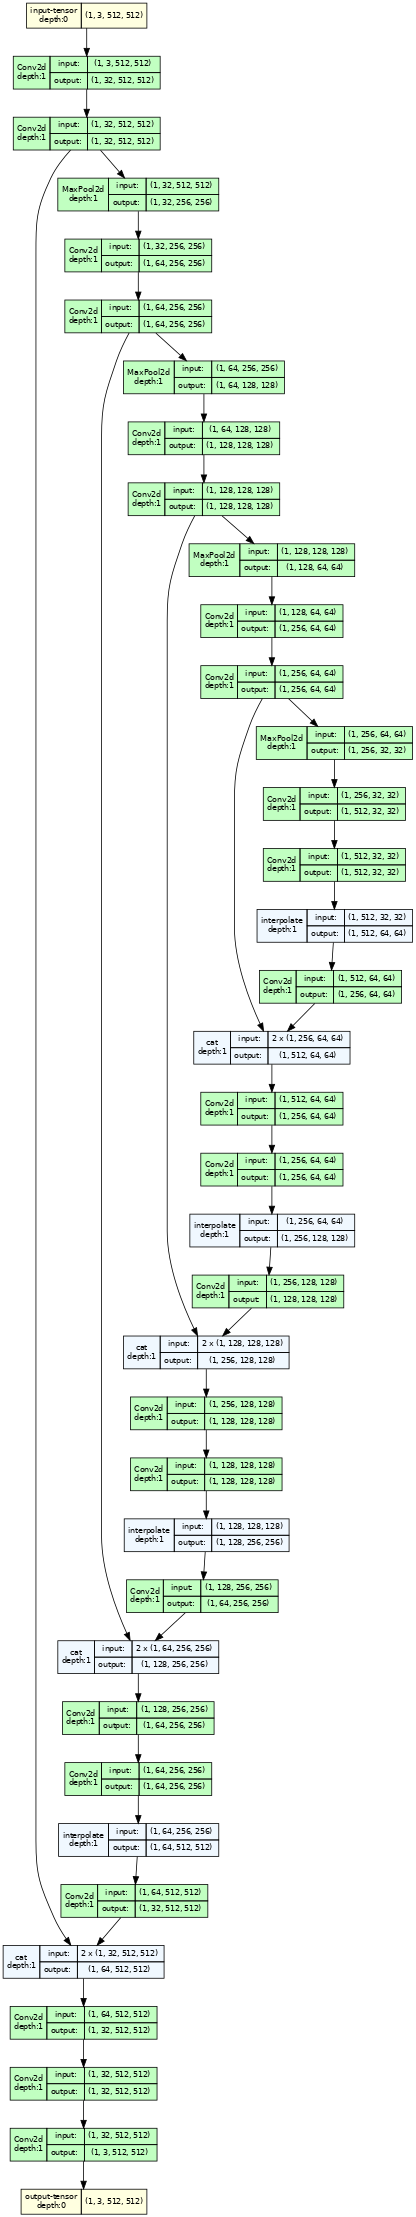

In [9]:
model_graph = draw_graph(
    model,
    input_size=(1,3,512,512),
    graph_name="Enhancement_Unet",
    device="cuda:0",
    save_graph=True,
    filename="/home/catchall/Documents/thesis/enhance/data/output/night_enhance/net"
)
model_graph.visual_graph

In [17]:
# graph [ordering=out rankdir=TB size="23.099999999999998,23.099999999999998" rotation=90]
!dot -Tpng /home/catchall/Documents/thesis/enhance/data/output/night_enhance/net -o /home/catchall/Documents/thesis/enhance/data/output/night_enhance/net.png